# Sprint9

In [1]:
import numpy as np
import pandas as pd

# ログ表示
class Log:
    # 表示ログレベル
    Loglevel = 0
    def logLevelset(level):
        # 表示ログレベルの設定
        Log.Loglevel = level
    def log_print(level, std, *variable):
        if(Log.Loglevel >= level):
            if(len(variable) == 0):
                print(std)
            else:
                for i in range(len(variable)):
                    index = std.find("}") + 1
                    # 改行なし表示
                    print(std[:index].format(variable[i]), end='')
                    # 表示した分を削除
                    std = std.replace(std[:index], "", 1)
                # 改行表示
                print(std)

# 1. データセットの用意

In [2]:
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split

# 保存先を指定
mnist_dir = "./mnist_data/"

# MNISTの読み込み
mnist = fetch_mldata('MNIST original', data_home=mnist_dir)
# trainとtestに分割する
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.14285, shuffle=False)
# ラベルをint型にしておく
y_train = y_train.astype(np.int)
y_test = y_test.astype(np.int)

/home/hiro/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/home/hiro/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


# データセットの確認

In [3]:
print(X_train.shape) # (60000, 784)
print(X_test.shape) # (10000, 784)
print(X_train[0].dtype) # uint8
print(X_train[0])

(60000, 784)
(10000, 784)
uint8
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  51 159 253 159  50   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252
 253 122   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 163 252 252 25

# 画像データの可視化

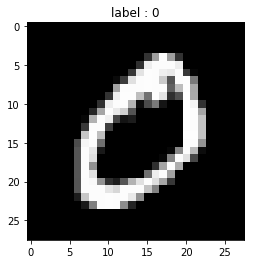

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

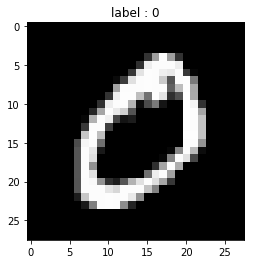

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [5]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # 値を確認

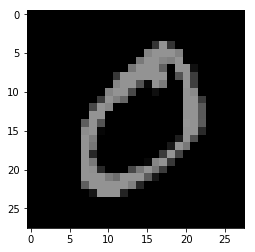

In [6]:
plt.imshow(image, 'gray', vmin = 0, vmax = 255)

# 2.前処理

In [7]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


In [8]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 784)
(12000, 784)


In [10]:
1e-3

0.001

# 3.スクラッチ

In [11]:
class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器

    Parameters
    ----------

    Attributes
    ----------
    """

    def __init__(self, verbose=True, num_epoch=30, batch_size=10, n_features=784, n_nodes1=400, n_nodes2=200, n_output=10,
                 lr_W1=1e-4, lr_W2=1e-4, lr_W3=1e-4, lr_b1=1e-4, lr_b2=1e-4, lr_b3=1e-4, sigma=1e-4):
        
        self.verbose = verbose
        self.num_epoch = num_epoch # epoch回数
        self.batch_size = batch_size # バッチサイズ
        self.n_features = n_features # 特徴量の数
        self.n_nodes1 = n_nodes1 # 1層目のノード数
        self.n_nodes2 = n_nodes2 # 2層目のノード数
        self.n_output = n_output # 出力のクラス数（3層目のノード数）
        
        # 学習率
        # 重み
        self.lr_W1 = lr_W1
        self.lr_W2 = lr_W2
        self.lr_W3 = lr_W3

        # バイアス
        self.lr_b1 = lr_b1
        self.lr_b2 = lr_b2
        self.lr_b3 = lr_b3
        
        # 内部保存パラメータ
        self.Llist = [] # 学習曲線データ
        
        # 重み
        self.W1 = sigma * np.random.randn(n_features, n_nodes1)
        self.W2 = sigma * np.random.randn(n_nodes1, n_nodes2)
        self.W3 = sigma * np.random.randn(n_nodes2, n_output)

        # バイアス
        self.b1 = 0
        self.b2 = 0
        self.b3 = 0
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """

        if self.verbose:
            #verboseをTrueにした際は学習過程などを出力する
            print()
        
        # ミニバッチ生成
        get_mini_batch = GetMiniBatch(X, y, batch_size=10)
    
        # エポック数分回す
        for epoch in range(self.num_epoch):
            print(epoch)
            for i, (mini_X, mini_y) in enumerate(get_mini_batch):
                # node1
                a1 = self._node(mini_X, self.W1, self.b1)
                #Z1 = self._sigmoid(a1)
                Z1 = self._tanh(a1)

                # node2
                a2 = self._node(Z1, self.W2, self.b2)
                #Z2 = self._sigmoid(a2)
                Z2 = self._tanh(a2)

                # node3
                a3 = self._node(Z2, self.W3, self.b3)
                Z3 = self._softmax(a3)

                # loss
#               L = - np.mean( np.sum(mini_y.T*np.log(Z3), axis=1) )
#               self.Llist.append(L)

                # バックプロパゲーション
                # 3層目の更新
                delta3 = Z3 - mini_y
                newW3 = np.dot(Z2.T, delta3)
                delta2 = self._delta(delta3, self.W3)

                # W3更新
                self.W3 = self.W3 - self.lr_W1*newW3
                # b3更新
                self.b3 = self.b3 - self.lr_b1*np.mean(delta3, axis=1)[:,np.newaxis]

                # 2層目更新
                newa2 = delta2 * (1 - self._sigmoid(a2)) * self._sigmoid(a2)
                #newa2 = delta2 * (1 - self._tanh(a2)**2) 
                newW2 = np.dot(Z1.T, newa2)
                delta1 = self._delta(newa2, self.W2)

                # W2更新
                self.W2 = self.W2 - self.lr_W2*newW2
                # b2更新
                self.b2 = self.b2 - self.lr_b2*np.mean(newa2, axis=1)[:,np.newaxis]

                # 1層目更新
                newa1 = delta1 * (1 - self._sigmoid(a1)) * self._sigmoid(a1)
                #newa1 = delta1 * (1 - self._tanh(a1)**2)
                newW1 = np.dot(mini_X.T, newa1)

                # W1更新
                self.W1 = self.W1 - self.lr_W1*newW1
                # b1更新
                self.b1 = self.b1 - self.lr_b1*np.mean(newa1, axis=1)[:,np.newaxis]

            L = - np.mean( np.sum(mini_y.T*np.log(Z3), axis=1) )
            self.Llist.append(L)
    
    def _node(self, Z, W, b):
        """
        ノード計算
        """
        return np.dot(Z, W) + b
    
    def _delta(self, delta, W):
        """
        デルタ(誤差)
        """
        return np.dot(delta, W.T)
    
    def _sigmoid(self, A):
        """
        活性化関数
        シグモイド関数
        """
        return 1 / (1 + np.exp(-1*A))
    
    def _tanh(self, A):
        """
        活性化関数
        ハイパブリック関数
        """
        return (np.exp(A) - np.exp(-1*A))/(np.exp(A) + np.exp(-1*A))
    
    def _softmax(self, A):
        """
        softmap関数
        """
        if A.ndim == 2:
            A = A.T
            A = A - np.max(A, axis=0)
            y = np.exp(A) / np.sum(np.exp(A), axis=0)
            return y.T

        A = A - np.max(A)
        return np.exp(A) / np.sum(np.exp(A))

    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        result = []
        get_mini_batch = GetMiniBatch(X, X, batch_size=10)
        
        for i, (mini_X, mini_y) in enumerate(get_mini_batch):
            # node1
            a1 = self._node(mini_X, self.W1, self.b1)
            #a1 = np.dot(mini_X, W1) + b1
            Z1 = self._sigmoid(a1)

            # node2
            a2 = self._node(Z1, self.W2, self.b2)
            #a2 = np.dot(Z1, W2) + b2
            Z2 = self._sigmoid(a2)

            # node3
            a3 = self._node(Z2, self.W3, self.b3)
            #a3 = np.dot(Z2, W3) + b3
            Z3 = self._softmax(a3)
            
            result.append(np.argmax(Z3, axis=1)[:,np.newaxis])
            
        return np.vstack(result)

# ミニバッチ

In [12]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    y : 次の形のndarray, shape (n_samples, 1)または(n_samples,)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード

    Retruns
    ----------
    for文で呼び出すと以下の2つを返す。最後のイテレーションでは、バッチサイズより小さいこともある。
    mini_X : 次の形のndarray, shape (batch_size, n_features)
      学習データのミニバッチ
    mini_y : 次の形のndarray, shape (batch_size, 1)または(batch_size,)
      正解値のミニバッチ
    """
    def __init__(self, X, y, batch_size = 10, seed=0):
        self.batch_size = batch_size
        # ランダムに並べ換える
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self.X = X[shuffle_index]
        self.y = y[shuffle_index]
        self._counter = 0
        # イテレーション数を計算する
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)

    def __len__(self):
        # len()が使われたときの処理
        return self._stop

    def __iter__(self):
        return self

    def __next__(self):
        # for文で呼ばれた際のループごとの処理
        if self._counter >= self._stop:
            # 最後まで進んだら終了
            self._counter = 0
            raise StopIteration()

        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self.X[p0:p1], self.y[p0:p1]

In [13]:
y_train_one_hot.shape

(60000, 10)

# フォワードプロパゲーション

In [14]:
batch_size = 10 # バッチサイズ
n_features = 784 # 特徴量の数
n_nodes1 = 400 # 1層目のノード数
n_nodes2 = 200 # 2層目のノード数
n_output = 10 # 出力のクラス数（3層目のノード数）

In [15]:
# X_train.shape

In [16]:
# n_features = 784
# n_node1 = 400
# sigma = 0.01 # ガウス分布の標準偏差
# # W1 = sigma * np.random.randn(n_features, n_node1)
# # W1: (784, 400)

In [17]:
# def sigmoid(A):
#     return 1 / (1 + np.exp(-1*A))

In [18]:
# def tanh(A):
#     return (np.exp(A) - np.exp(-1*A))/(np.exp(A) + np.exp(-1*A))

In [19]:
# def softmax(A):
#     if A.ndim == 2:
#         A = A.T
#         A = A - np.max(A, axis=0)
#         y = np.exp(A) / np.sum(np.exp(A), axis=0)
#         return y.T
# # 
#     A = A - np.max(A)
#     return np.exp(A) / np.sum(np.exp(A))

In [20]:
# np.sum(softmax(X_train))

In [21]:
# # node1 重み
# b1 = 1 
# a1 = np.dot(X_train, W1) + b1
# print(a1.shape)
# print(W1.shape)

In [22]:
# # node1 活性化関数
# Z1 = sigmoid(a1)
# Z1.shape

In [23]:
# # node2 重み
# W2 = sigma * np.random.randn(n_nodes1, n_nodes2)
# W2.shape

In [24]:
# # node2 重み
# b2 = 1
# W2 = sigma * np.random.randn(n_nodes1, n_nodes2)
# a2 = np.dot(Z1, W2) + b2
# a2.shape

In [25]:
# # node2 活性化関数
# Z2 = sigmoid(a2)
# Z2.shape

In [26]:
# # node3 重み
# b3 = 1
# W3 = sigma * np.random.randn(n_nodes2, n_output)
# a3 = np.dot(Z2, W3) + b3
# a3.shape

In [27]:
# yhat = softmax(a3)
# yhat.shape

In [28]:
#L = - np.sum(np.dot(y_train_one_hot.T, np.log(yhat)))

In [29]:
#L

In [30]:
# y_train_one_hot.shape

In [31]:
# y_train[0]

# バックプロパゲーション

In [32]:
# # 3層目の更新
# delta3 = y_train_one_hot - yhat
# delta3.shape

In [33]:
# np.mean(delta3, axis=1).shape

In [34]:
# b3 = delta3

In [35]:
# b3.shape

In [36]:
# newW3 = np.dot(Z2.T, delta3)

In [37]:
# delta2 = np.dot(delta3, W3.T)

In [38]:
# # 2層目更新
# newa2 = delta2 * (1 - sigmoid(a2)) * sigmoid(a2)

In [39]:
# b2 = newa2

In [40]:
# newW2 = np.dot(Z1.T, newa2)

In [41]:
# delta1 = np.dot(newa2, W2.T)

In [42]:
# # 1層目更新
# newa1 = delta1 * (1 - sigmoid(a1)) * sigmoid(a1)

In [43]:
# b1 = newa1

In [44]:
# newW1 = np.dot(X_train.T, newa1)

# 4.実行

In [45]:
Nw = ScratchSimpleNeuralNetrowkClassifier()

In [46]:
Nw.fit(X_train, y_train_one_hot)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


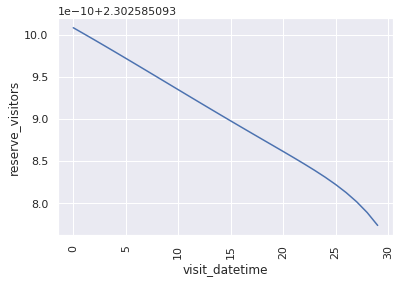

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.plot(Nw.Llist)
plt.xlabel("visit_datetime")
plt.ylabel("reserve_visitors")
plt.xticks(rotation="vertical")
plt.show()

In [48]:
Nw.predict(X_test)

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

# 5. 説明文
## 5.1 ニューラルネットワークの仕組み
### ニューラルネットワークとは
これは、簡単に説明すると、人間の脳の仕組みをコンピュータに適用したものである。<br>
人間の脳には，ニューロンと呼ばれる神経細胞がある。<br>
このニューロンは，他のニューロンから信号を受け取ったり，信号を受け渡したりすることによって，情報を処理する。

![](https://cdn-ak.f.st-hatena.com/images/fotolife/M/McG/20161115/20161115225427.png)
つまり、この仕組みをコンピュータで再現してあげると、人間の脳と同じ能力をコンピュータがもてるのではないかと考えたわけである。
それがニューラルネットワークの始まりである。

### ニューロンモデル
それでは、ニューラルネットワークを作る前に，まずはニューロン単体で考えてあげる必要がある。<br>
先程述べたように、ニューロンは信号を受取り、その情報を処理して受け渡す。<br>
つまり、以下のようにモデル化出来る。
![](https://cdn-ak.f.st-hatena.com/images/fotolife/M/McG/20161115/20161115230946.png)
xという信号を受取り、関数fにより処理して、yという信号を受け渡している状況である。<br>
ここで、重みとバイアスを導入する。<br>
受け取った信号をそのまま処理するのではなく、信号を重み付けのために重みのwをかけ、さらに定数項として、バイアスbと呼ばれるものを足してあげる。<br>
すると，ニューロンモデルは以下のようになる。
![](https://cdn-ak.f.st-hatena.com/images/fotolife/M/McG/20161115/20161115231819.png)
入力信号xに、重みwがかけられ、定数項としてバイアスbが足されるので、入力信号は$wx+b$となる。<br>
それが、関数fによって処理されるので、出力は，$y=f(wx+b)$となる。

### 処理用の関数の正体
では、$y=f(wx+b)$における関数fとはどのような関数なのか。<br>
これは$f(x)=11+e−x$という形の関数で、シグモイド関数と呼ばれる。<br>
$f(x)=11+e−x$をグラフ化してみると以下のようになる。
![](https://cdn-ak.f.st-hatena.com/images/fotolife/M/McG/20161115/20161115233235.png)
結果から、$f(x)=11+e−x$は$x$が−∞に行けば行くほど0に近づき、xが∞に行くほど、1に近づく、そんな関数である。<br>
ここで、y=f(wx+b)は、f(x)=11+e−xより、f(wx+b)=11+e−(wx+b)となるわけである。<br>
整理すると、
![](https://cdn-ak.f.st-hatena.com/images/fotolife/M/McG/20161116/20161116011505.png)
### 複数入力の場合
今までは、入力が一つの場合を見てきた。
今度は、複数入力の場合をみてみよう。
![](https://cdn-ak.f.st-hatena.com/images/fotolife/M/McG/20161115/20161115235033.png)
それぞれの入力x1,x2,x3に、重みがそれぞれw1,w2,w3かかり、バイアスbを足してあげたのを関数fで処理すればいいので、出力は、$f(w1x1+w2x2+w3x3+b)$となる。<br>
    ここで$w1x1+w2x2+w3x3$というのは、${\bf w} = \begin{bmatrix}w_1 \\ w_2 \\ w_3 \end{bmatrix}$と，${\bf x} = \begin{bmatrix}x_1 \\ x_2 \\ x_3 \end{bmatrix}$の内積で書くことができる。<br>
つまり，出力は$f( {\bf w}^T {\bf x}+b)$と書くことができる。<br>
このニューロンを，複数つなぐと，どんどんいろんな出力を作ることが出来できる。
![](https://cdn-ak.f.st-hatena.com/images/fotolife/M/McG/20161116/20161116001743.png)
この、入力と出力の間に隠れたニューロンのことを、隠れニューロンと呼ぶ。また、その隠れニューロンが層になってるところを、中間層と呼びまぶ。<br>
また、いきなりどこかから入力信号が現れるのもおかしな話なので、入力信号を出すニューロンをはじめにおいてあげる。<br>
すると，以下のようになる。
![](https://cdn-ak.f.st-hatena.com/images/fotolife/M/McG/20161116/20161116003050.png)
なんとなく，人間の脳っぽいことをやっているなっていうイメージが出来たのではないだろうか。

## 5.2 バックプロパゲーションとは何か
誤差逆伝播法（BP：バック・プロパゲーション）は1986年、米スタンフォード大学のラメルハート教授らが発表した多層階層型ニューラルネットワークの学習方法。入力層へ或る情報が与えられたら、出力層はそれに対応した或る情報を出力しなければならない場合の学習方法となる。<br>
最初は入力層→中間層→出力層への結合係数はランダムに与えられるので、或る入力情報に対し、出力層はそれに対応した出力をするとは限らない。望ましい出力との誤差を教師信号として与える事により、次第に結合係数を変化させ、最終的に正しい出力が得られるようにする。ここでは、結合係数を変えて行く事を学習と呼ぶ。<br>
この学習方法には、最急降下法（勾配法）という計算方法が使われる。

## 5.3 活性化関数の役割とは何か
### 活性化関数：シグモイド関数
シグモイド関数は次の図のような指数を用いた関数となる。横軸が入力値の合計値で、縦軸が出力値となる。入力値の合計値が小さければ小さいほど出力値は0に近づき、入力値の合計値が大きければ大きいほど出力値が1に近づいていく。
![](https://newtechnologylifestyle.net/wp-content/uploads/2018/02/%E3%82%B7%E3%82%B0%E3%83%A2%E3%82%A4%E3%83%89%E9%96%A2%E6%95%B0.png)
ここで分かるのは、シグモイド関数の計算式とグラフの式だけである。<br>
シグモイド関数は2クラスの識別問題の場合に非常によく使用される。<br>
つまり「0または1」という2つの解を求める場合である。<br>
数字だとイメージがしづらいので、動物を例にして説明する。「犬か猫」のどちらかになるかを判定する画像認識があったとする。その場合は、言い換えると、「犬か犬ではないか」と表現することができる。<br>
先ほどのニューロンの図で表すと、活性化関数は「犬」の確率を表す。<br>
つまり、INPUTして何かしらの入力値を受け取り、活性化関数にわたすことで「犬」の確立が80%とか、「犬」の確立は20%という結果値を得ることができる。また「犬」の確立が20%なら、答えは「猫」となる。
![](https://newtechnologylifestyle.net/wp-content/uploads/2018/02/%E3%82%B7%E3%82%B0%E3%83%A2%E3%82%A4%E3%83%89%E9%96%A2%E6%95%B0%EF%BC%88%E3%82%A4%E3%83%A9%E3%82%B9%E3%83%88%EF%BC%89.png)
### 活性化関数：ソフトマックス関数
先ほどのシグモイド関数では2クラス問題と呼ばれる、「0または1」という2つの解を求める場合について行った。では、それが多クラス問題となったらどうなるか。<br>
例えば、「犬、猫、ライオン、熊」とかである。<br>
その場合、確立としては 犬=>0%、猫=>60%、ライオン=>20%、熊=>20%　という表現となっていると扱いやすい。<br>
ソフトマックス関数は最終的な合計値が1となるように算出することが特徴。つまり、全てのカテゴリを合計した場合に100%となるよう算出することが出来るとも言える。
ソフトマックス関数は何しかしらの計算で求められてきた場合について、 犬=>0%、猫=>60%、ライオン=>20%、熊=>20%　：合計 100%と計算できる特徴を持っているということである。<br>
そのため、多クラス問題の識別ではソフトマックス関数がよく使用される。
### 活性化関数：恒等関数
いままで、2クラス問題、多クラス問題とシグモイド関数やソフトマックス関数と活性化関数を用いてある特定の確立に変換してきた。<br>
しかしながら、確率に変換する必要もなく、受け取った値そのまま出力したいという場合もあるでしょう。その場合は恒等関数の出番。<br>
恒等関数は受け取ったそのままの値を変換せずに出力する。<br>
回帰問題などで、入力パラメータから受け取ったそのままの値を変換せずに出力したい場合に恒等関数が使わる場合がある。
### 活性化関数：ReLU
次の図のような関数となる。横軸が入力値の合計値で、縦軸が出力値となる。入力値の合計値が0以下の場合は出力値が0となり、0以上の場合は、そのまま入力値が出力値となる。
![](https://newtechnologylifestyle.net/wp-content/uploads/2018/02/ReLU.png)
よく見てみると入力の値がマイナスだった場合は0という一定値。入力の値がプラスの場合はそのまま入力の値を出しているので、恒等関数と同じようになる。プラスの値のみ恒等関数を使用したいという場合に使用される。